In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from math import pi


In [2]:
## Reading the samptimes data
file = open('samptimes.csv')
samptimes = csv.reader(file)
stimes=[]
for row in samptimes:
    stimes.append(row[0])
file.close()
## Reading the y data
file = open('y.csv')
y = csv.reader(file)
Ydata=[]
for row in y:
    Ydata.append(row[0])
file.close()

In [3]:
stimes = np.asfarray(stimes)
X = np.asfarray(stimes).reshape([stimes.size,1])
Y = np.asfarray(Ydata).reshape([X.shape[0],1])
print("Yshape = ",Y.shape)


X.sizeNp  (259, 1)
Yshape =  (259, 1)


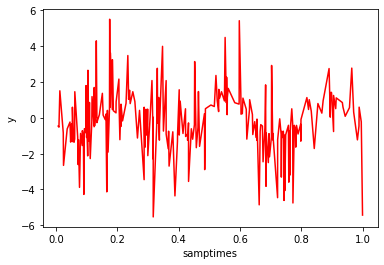

In [4]:
plt.plot(X,Y,'r')
plt.xlabel('samptimes')
plt.ylabel('y')
plt.show()


In [22]:
def matrix_producer(time_samples, N):
	B=np.int64((N-1)/2)
	B_mat= np.linspace(-B, B, 2*B+1).reshape([2*B+1,1]).T
	A = np.exp(np.matmul(time_samples,B_mat)*2*pi*1j)
	return A


In [70]:
A = matrix_producer(X,201)    #here X is the samp_times vector
x=np.linspace(0,Y.shape[0],Y.shape[0])
fourier_coeff=np.matmul(np.linalg.inv(np.matmul(A.T,A)),np.matmul(A.T,Y*np.exp(x)))

[4.11344882e-10 3.92870497e+00 2.63228260e+00 1.23253825e+02
 4.05070805e+01 4.93826636e+01 1.16515735e+00 6.03072907e-02
 3.34209898e+00 5.22096868e+01 5.67686126e+01 6.68580858e+01
 3.06526831e-01 6.98679157e+00 9.15006139e+02 4.13661647e-02
 6.12026592e+02 3.37054904e-01 1.00958553e-11 2.94417958e+01
 1.89136584e+04]


21

In [71]:
y_pred= np.dot(A,fourier_coeff)
y_pred

array([[ 6.54902623e-001-1.31691455e+000j,
         2.89053656e+000-5.21195510e+000j,
         1.39793899e+001-1.38102441e+001j, ...,
        -1.85604278e+111-5.58812532e+111j,
         1.19387640e+110-2.48800770e+112j,
         2.49351367e+112-4.16867282e+112j],
       [ 1.54106953e+000+3.06675855e+000j,
         3.45872180e+000+6.47047115e+000j,
         1.11124213e+001+1.99670302e+001j, ...,
         1.59280224e+111+1.08454414e+112j,
         4.20246870e+111+3.14889640e+112j,
         2.57224311e+112+9.24925058e+112j],
       [ 1.76197949e+000+1.39750807e+000j,
         1.15659167e+000+3.23697616e+000j,
         9.37596932e-001+6.67505730e+000j, ...,
         5.75382119e+111+2.47853161e+111j,
         2.04090077e+111+2.27267630e+112j,
         4.32646930e+111+3.98165500e+112j],
       ...,
       [ 1.16044717e+001+1.93028734e+000j,
         3.21457637e+001+1.01827318e+001j,
         8.89143221e+001+1.78228052e+001j, ...,
         4.51686691e+112+8.66249945e+111j,
         1.29913690

C:\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


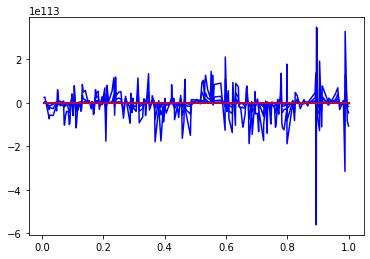

In [72]:
y_pred= (y_pred)
plt.plot(X,y_pred, color = 'b')
plt.plot(X,Y, color = 'r')
plt.show()